# CTD Data Processing (a little bit)

In [1]:
%matplotlib inline

All my code revolves around netCDF files, which is a common way to handle oceanography data. For Argo, you can access any float (I think) data here: https://fleetmonitoring.euro-argo.eu/dashboard

I am not super great with their WMO ID because I am accustomed to the floats produced by UW who use a different ID (the FLID) but I chose float 12696/5905980. Here is the link to the ifremer page for it: https://fleetmonitoring.euro-argo.eu/float/5905980 


You all have your own float you want to look at, so go find the webpage for your own float. Matt can follow along with float 12696, which I love because it provided a look at how dissolved oxygen values changed throughout Drake Passage which I needed for my research. 

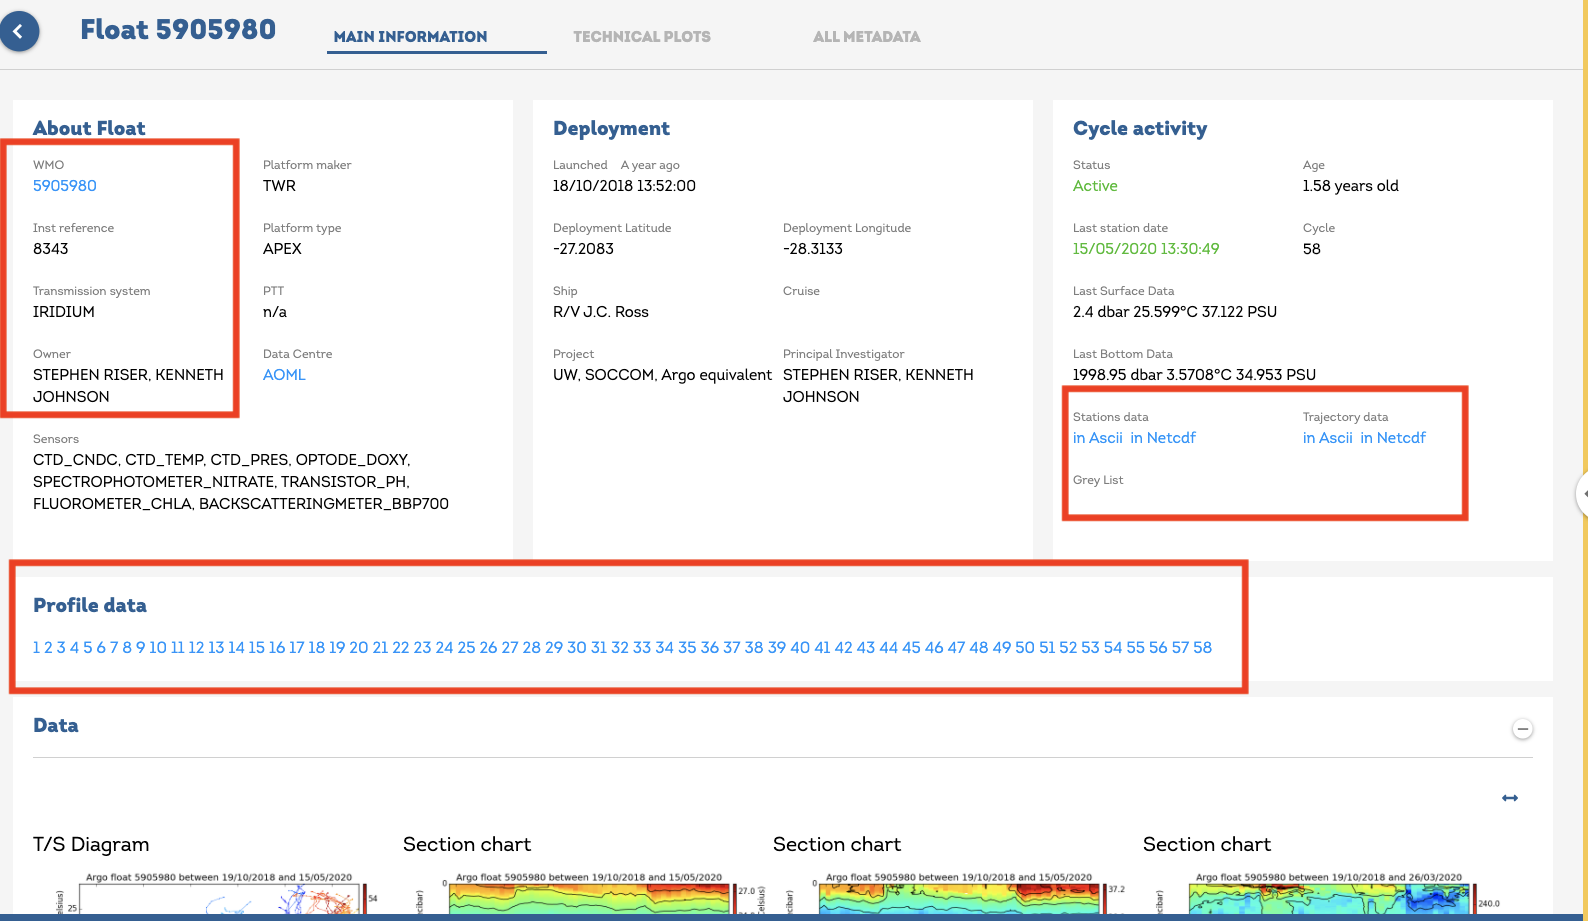

Above is the home site for the data for my float. The important aspects are boxed in red. You can see the WMOID, the transmission system (should be the same for all argo floats) and the owner (in this case, SOCCOM reps from UW). The bottom red box shows the profiles, each of which you can click on to download that particular profile and to access pre-made plots of the data. 


The important thing is the box on the right-hand side. In it, you can download all the station data (profile data) and the trajectory data (not needed for this assignment, I don't use it, can be used in other things). Below what you can see on this screen is pre-made plots of the floats entire data you can reference to make sure yours looks right. IMPORTANT NOTE ABOUT PREMADE PLOTS: They used severe and automized QCing, so valid anomalies can be thrown out. That happened to a few of my anomalies. Never rely too heavily on pre-made plots. 

Click on the "in NetCDF" button for the stations data. It will prompt you to give your email, and you'll have to wait a few minutes for the email with the download button to show up. The email will reference Coriolis, which is "computer" that argo data gets stored on (I think).

Now you have your data! Fantastic. We can start processing it! It will be in NetCDF format, so you'll have to import a library to handle NetCDF data. I use xarray.  

In [2]:
import xarray as xr
from xarray import Dataset

/Users/soybean/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/soybean/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


xarray is a library that is not unlike the typical netCDF library netCDF4. I find xarray more versatile and easy to use so we'll be dealing with this library. Dataset is a sub-library that includes the netCDF dataset reading functions we will want to use, so you have to import that, too. 

In [3]:
# to read in the netCDF file, do the following:
f = xr.open_mfdataset("5904854_20200525004759866.nc")
# the format of the command is xr.open_mfdataset which means you are accessing the xr (xarray) library and 
# then after the dot you are selecting the function within xr you would like to use. In this case, 
# it is a function to open the dataset listed in parenthesis. Everytime you type f now it will open the dataset 

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/Users/soybean/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


Now that you have your netCDF file read in, you can take a peak at what is inside. 

In [4]:
# ALWAYS a good idea to look at the variables before you start to use them. Oceanographers are BULLSHIT 
# and can never agree on any common formatting, even though there are "tendencies". Never trust an oceanographer
f.variables

Frozen(OrderedDict([('DATA_TYPE', <xarray.Variable ()>
array(b'Argo profile    ', dtype=object)
Attributes:
    long_name:  Data type), ('FORMAT_VERSION', <xarray.Variable ()>
array(b'3.0 ', dtype=object)
Attributes:
    long_name:  File format version), ('HANDBOOK_VERSION', <xarray.Variable ()>
array(b'1.2 ', dtype=object)
Attributes:
    long_name:  Data handbook version), ('REFERENCE_DATE_TIME', <xarray.Variable ()>
array(b'19500101000000', dtype=object)
Attributes:
    long_name:    Date of reference for Julian days
    conventions:  YYYYMMDDHHMISS), ('DATE_CREATION', <xarray.Variable ()>
array(b'20200525005053', dtype=object)
Attributes:
    long_name:    Date of file creation
    conventions:  YYYYMMDDHHMISS), ('DATE_UPDATE', <xarray.Variable ()>
array(b'20200525005053', dtype=object)
Attributes:
    long_name:    Date of update of this file
    conventions:  YYYYMMDDHHMISS), ('PLATFORM_NUMBER', <xarray.Variable (N_PROF: 248)>
dask.array<open_dataset-8abe1a167dd2457e60939bb83474c

Typically, the data is accessed through the name that comes after the long name. Example: "JULD" is the julian day that the float took a certain profile. The days are calculated with respect to a reference day, but if we need to get into that we will later. It is not necessary for TS diagrams or trajectory plots.  

Lets make a super basic temperature plot with respect to pressure. There are a lot of variables in the Argo datasets, including flags (meaning, is there a reason to believe a specific data point or profile is incorrect). For the purposes of basic plots for class, however, you can skip looking at the flags and simply take the "Adjusted values" they give you. For pressure:

In [5]:
P = f.variables['PRES'].values[:]

# This taps into the f datafile (the one we read above), and then looks through the variables for one named 
# 'PRES' which is the pressure
# and then reads in all the values { The []s indicate its the indices of the data and the : indicates you want it all}.
# Now you have all the pressure values of that float.

In [6]:
T = f.variables['TEMP'].values[:]
T

array([[5.787 , 5.79  , 5.791 , ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [5.062 , 5.062 , 5.062 , ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [6.809 , 6.81  , 6.809 , ..., 2.432 , 2.4176,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]],
      dtype=float32)

It's time to go over some basic plotting in python. The library 'matplotlib.pyplot' has all the basic python plotting functions. In order to not continuously type matplotlib.pyplot we will import it as plt (as is convention) so it's easier to use. 


The most basic plot is plt.plot(x,y,'r.') where x represent the x-values, y represents the y-values, and 'r.' represents red dots. The 'r.' can be broken down into 2 values. r is the color arguement, . is the shape arguement. More information shown below, but all the possible arguements can be googled if you want to represent data in a specific way.

## The Trajectory Plot:

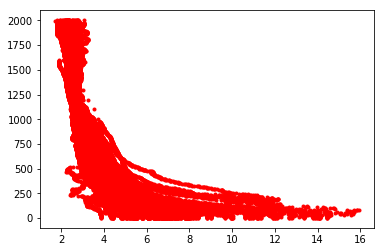

In [9]:
import matplotlib.pyplot as plt 
# Import the library as plt to save typing time
plt.plot(T,P,'r.');
# the most basic representation... red dots

We see an issue here. The pressure is listed in the wrong way, with the deepest values are at the top of the y-axis. This is because pressure is a positive value, not a negative value. We could read the pressure values in in the opposite way via P = f.variables['PRES'].values[:,::-1] but plot funciton will still automatically set the y-axis to be greatest at the top. Instead we do this:

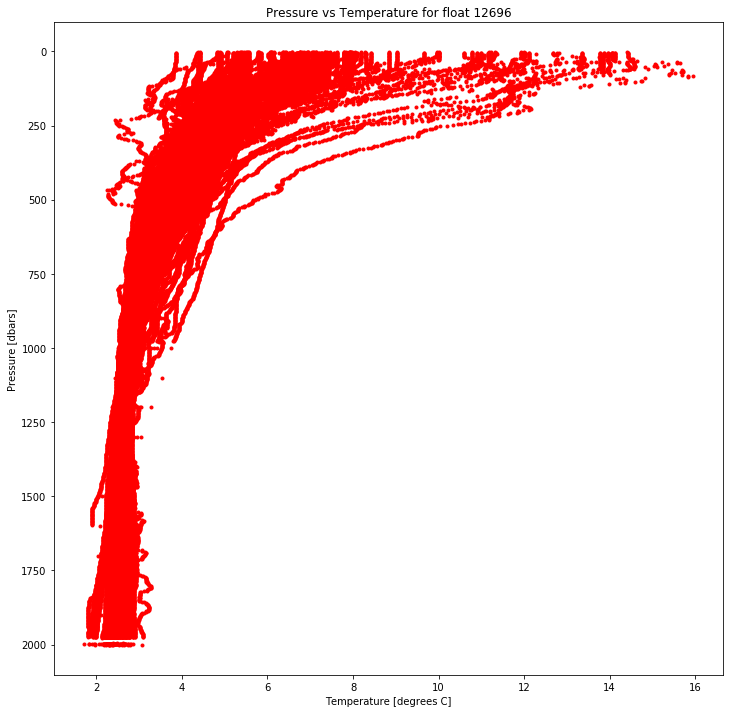

In [10]:
fig = plt.figure(1,(12,12))
# this initiates a figure of the size 12 pixels by 12 pixels 
# what gets plotted after this will be plotted on that initiated image


plt.gca().invert_yaxis()
# this inverts the y-axis to demonstrate a more sensical image

plt.plot(T,P,'r.');
# the most basic representation... red dots

plt.title('Pressure vs Temperature for float 12696')
plt.ylabel('Pressure [dbars]')
plt.xlabel('Temperature [degrees C]');

Now let's talk about how to display the trajectory of the Argo floats well. We will use Cartopy for these plots, because it is the best library to show the Earth's surface. 

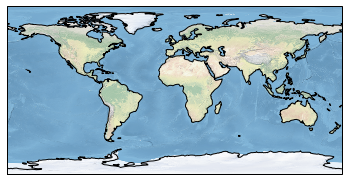

In [11]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

plt.show()

Look! A plot of the world. This shall be the backdrop of our Argo trajectory. 

In [12]:
# We need to read in the recorded latitude and longitude values to plot the Argo
lat = f.variables['LATITUDE'].values[:]
lon = f.variables['LONGITUDE'].values[:]

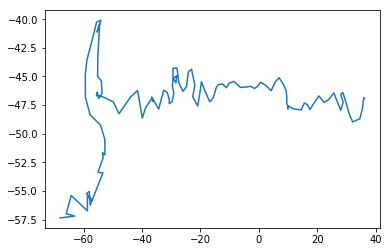

In [13]:
plt.plot(lon,lat)

Well, that's the trajectory of the Argo float. Right? But it looks terrible. So let's fix that. 

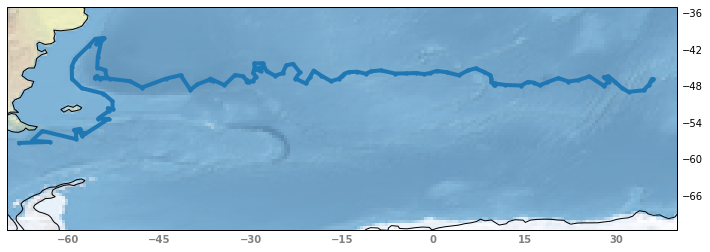

In [14]:
fig = plt.figure(1,(12,12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent([-70,40, -35, -60])

plt.plot(lon,lat,'.-',linewidth=4)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.01, color='gray', alpha=0.5)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}

I'll leave you guys to add your own titles and xlabels and ylabels and such before you submit the homework/ 

## TS Diagram:

In [15]:
T = f.variables['TEMP'].values[:]
S = f.variables['PSAL'].values[:]

In [33]:
t_AAIW = T[(T > 3) & (T <7) & (S > 33.8) & (S < 34.5)]
s_AAIW = S[(T > 3) & (T <7) & (S > 33.8) & (S < 34.5)]

t_CDW = T[(T > 1) & (T <2) & (S > 34.6) & (S < 34.75)]
s_CDW = S[(T > 1) & (T <2) & (S > 34.6) & (S < 34.75)]

t_STUW = T[(T > 8) & (S < 34.3)]
s_STUW = S[(T > 8) & (S < 34.3)]

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/Users/soybean/anaconda3/lib/python3.

In [34]:
t_NADW

array([5.787, 5.79 , 5.791, ..., 3.004, 3.003, 3.001], dtype=float32)

In [35]:
T

array([[5.787 , 5.79  , 5.791 , ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [5.062 , 5.062 , 5.062 , ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [6.809 , 6.81  , 6.809 , ..., 2.432 , 2.4176,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]],
      dtype=float32)

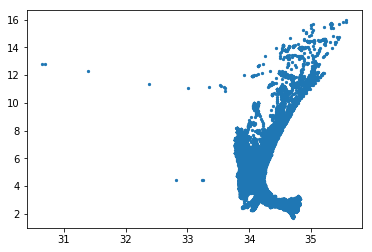

In [36]:
plt.scatter(S,T,s=5)

# use this to figure out your T and S range

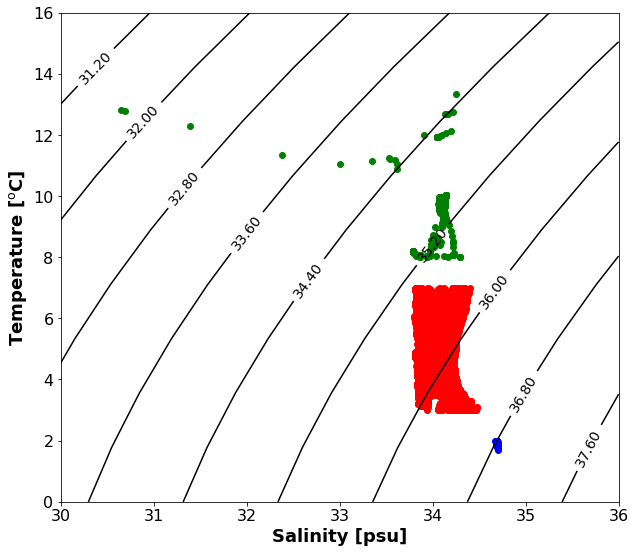

In [37]:
import gsw
import numpy as np

fig,ax=plt.subplots()
fig.set_size_inches(10,9)
    
s_grid, t_grid = np.meshgrid(
    np.linspace(30,36,10),
    np.linspace(0,16,10)
)

pref = 2000
dens_grid = gsw.rho(s_grid.ravel(), t_grid.ravel(), pref).reshape(s_grid.shape)-1000

con = plt.contour(s_grid, t_grid, dens_grid, 11, colors='k')
plt.clabel(con, fmt='%4.2f',fontsize=14)
plt.xlabel('Salinity [psu]',fontsize=18,fontweight='bold')

plt.ylabel('Temperature [$^{\mathrm{o}}$C]',fontsize=18,fontweight='bold')
plt.tick_params(axis='both', labelsize=16)

sc=ax.scatter(s_AAIW,t_AAIW,c='red')
sc=ax.scatter(s_CDW,t_CDW,c='blue')
sc=ax.scatter(s_STUW,t_STUW,c='green')


The actual water mass finding involves finding some sort of explanation for what water masses could be there and then classify them above. 

For those who are looking in the atlantic ocean, this might be helpful: http://whp-atlas.ucsd.edu/atlantic/sections.htm click on section track that looks like it will give you the most information relating to your Argo float. There are pages for Pacific, Indian, and Southern ocean on the website, too. 

For the *North Atlantic*: Subducted thermocline (have to look closer for real water properties), AAIW, Mediteranean Intermediate Water, Labrador Sea Water, NADW. google each for water properties. 


For *South Atlantic*: Subducted thermocline, lower thermocline, AAIW, NADW. 


For *North Pacific*: Subducted thermocline, NPIW, AAIW, UCDW, PDW, LCDW


For *South Pacific*: Subducted thermocline, AAIW, UCDW, PDW, LCDW